In [1]:
from utility_dfcutter import *

# j->tau uncertainty

In [14]:
# varate jet-tau misID
print('calculate tau misidentifaction uncertainty based on 20%/100GeV')
for selection in ['etau','mutau']:
    for nbjet in ['==1','>1']:
        df = DFCutter(selection,nbjet,"mctt").getDataFrame()
        slt = (df.genCategory==16) | (df.genCategory==17)
        up = (np.sum( df[slt].eventWeight*(1+0.002*df[slt].lepton2_pt))/np.sum(df.eventWeight[slt]))
        print('{:6} with nb{:4} is {:4.3f}%'.format(selection,nbjet,(up-1)*100 ))

calculate tau misidentifaction uncertainty based on 20%/100GeV
etau   with nb==1  is 6.672%
etau   with nb>1   is 6.655%
mutau  with nb==1  is 6.687%
mutau  with nb>1   is 6.655%


In [ ]:
# varate jet-tau misID
print('calculate tau misidentifaction uncertainty based on 20%/100GeV')
for selection in ['etau','mutau']:
    for nbjet in ['==1','>1']:
        df = DFCutter(selection,nbjet,"mctt").getDataFrame()
        slt = (df.genCategory==16) | (df.genCategory==17)
        up = (np.sum( df[slt].eventWeight*(1+0.002*df[slt].lepton2_pt))/np.sum(df.eventWeight[slt]))
        print('{:6} with nb{:4} is {:4.3f}%'.format(selection,nbjet,(up-1)*100 ))

In [4]:
df = DFCutter('etau','==1',"mctt").getDataFrame()

In [3]:
df.loc[df.tauGenFlavor==15,'lepton2_pt'] *= 1000

In [5]:
df.tauGenFlavor

0         1
1        15
2        15
3        15
4        21
5         5
6        15
7         3
8         3
9        15
10       15
11        2
12        3
13       15
14        2
15        5
16       15
17       15
18        2
19       15
20       15
21        5
22       15
23       15
24       15
25       15
26       15
27       15
28       15
29       15
         ..
69888     4
69889    15
69890    15
69891    15
69892    15
69893    15
69894    15
69895     5
69896     5
69897     3
69898    15
69899    15
69900    15
69901    15
69902    15
69903     2
69904     4
69905     2
69906     3
69907    15
69908    21
69909    15
69910    15
69911    15
69912    21
69913    15
69914    15
69915     0
69916    15
69917    15
Name: tauGenFlavor, Length: 69918, dtype: int64

In [27]:
print('calculate tau misidentifaction uncertainty based on SF_misid.csv')
sf = pd.read_csv(common.getBaseDirectory()+'data/misidtemplates/SF_misid.csv')

for selection in ['etau','mutau']:
    for nbjet in ['==1','>1']:
        df = DFCutter(selection,nbjet,"mctt").getDataFrame()
        slt = (df.genCategory==16) | (df.genCategory==17)
        df = df[slt]
        
        n0 = df.eventWeight.sum()
        deltan = 0
        for i in range(6):
            iptbin = 'lepton2_pt>{} & lepton2_pt<{}'.format(sf.bin_pT1[i],sf.bin_pT2[i])
            deltan += sf.sigma_SF_j2MisID[i]*df.query(iptbin).eventWeight.sum()
        print('{:6} with nb{:4} is {:4.3f}%'.format(selection,nbjet,(deltan/n0)*100 ))


calculate tau misidentifaction uncertainty based on SF_misid.csv
etau   with nb==1  is 4.694%
etau   with nb>1   is 4.710%
mutau  with nb==1  is 4.691%
mutau  with nb>1   is 4.699%


In [28]:
sf

,Unnamed: 0,bin_pT1,bin_pT2,SF_b2MisID,SF_q2MisID,SF_j2MisID,sigma_SF_b2MisID,sigma_SF_q2MisID,sigma_SF_j2MisID
0,0,20,25,1.061695,0.976550,1.026797,0.118068,0.078930,0.054896
1,1,25,30,1.177661,0.880821,0.965698,0.115345,0.064026,0.046043
2,2,30,40,1.488901,0.818183,0.967034,0.107398,0.058738,0.044188
3,3,40,50,0.972327,0.789591,0.901601,0.090877,0.052912,0.041498
4,4,50,65,0.897842,0.896520,0.916028,0.133053,0.060036,0.044370
5,5,65,80,0.857520,0.672976,0.722276,0.165262,0.053955,0.043309


In [ ]:
df.query('lepton2_pt>25 & lepton2_pt<30').eventWeight.sum()
df.query('lepton2_pt>40 & lepton2_pt<50').eventWeight.sum()
df.query('lepton2_pt>50 & lepton2_pt<65').eventWeight.sum()
df.query('lepton2_pt>65 & lepton2_pt<80').eventWeight.sum()

In [121]:
portion1,portion2 = [],[]
for selection in ["ee","mumu","etau","mutau","mu4j","e4j"]:
    df = DFCutter(selection,'==1',"mcz").getDataFrame()
    nEvent = df.eventWeight.sum()
    nEventList = []
    for i in range(4):
        nEvent_i = df[df.nPartons==i].eventWeight.sum()
        nEventList.append(nEvent_i/nEvent )
    portion1.append(nEventList)
    
    df = DFCutter(selection,'>1',"mcz").getDataFrame()
    nEvent = df.eventWeight.sum()
    nEventList = []
    for i in range(4):
        nEvent_i = df[df.nPartons==i].eventWeight.sum()
        nEventList.append(nEvent_i/nEvent )
    portion2.append(nEventList)

portion1,portion2 = np.array(portion1).T,np.array(portion2).T

In [122]:
portion1

array([[ 0.01651001,  0.01215556,  0.        ,  0.        ,  0.00904057,
         0.00822661],
       [ 0.09787141,  0.13687011,  0.11800438,  0.0742606 ,  0.02584116,
         0.02431016],
       [ 0.9648509 ,  0.96309633,  1.02876305,  1.12663637,  1.07204435,
         1.05848008],
       [-0.07923231, -0.112122  , -0.14676743, -0.20089697, -0.10692609,
        -0.09101685]])

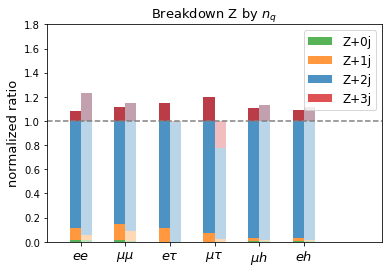

In [131]:
%matplotlib inline

plt.figure(facecolor='w')
colorlist = ['C2','C1','C0','C3']
labellist = ['Z+0j','Z+1j','Z+2j','Z+3j']
ticklist = [r"$ee$",r"$\mu\mu$",r"$e\tau$",r"$\mu\tau$",r"$\mu h$",r"$eh$"]

x,bins = [np.arange(6)]*4, np.arange(0,6,0.25)
w = [portion1[i,:] for i in range(portion1.shape[0])]
plt.hist(x,bins,weights=w,stacked=True, alpha=0.8, color=colorlist,label=labellist)
plt.legend(fontsize=12)

x,bins = [np.arange(6)+0.3]*4, np.arange(0,6,0.25)
w = [portion2[i,:] for i in range(portion2.shape[0]) ]
plt.hist(x,bins,weights=w,stacked=True, alpha=0.3, color=colorlist)
plt.axhline(1,c='grey',linestyle='--')

plt.xticks(np.arange(6)+0.25,ticklist,fontsize=13)
plt.xlim(-0.5,7)
plt.ylim(0,1.8)
plt.title(r'Breakdown Z by $n_q$ ',fontsize=13)
plt.ylabel('normalized ratio',fontsize=13)
plt.savefig('../plots/DY.png',dpi=300)

In [2]:
df = DFCutter('mumu','==1',"mcz").getDataFrame()
y1 = np.load('../data/pileup/sf_pileup_up.npy')
df.eventWeight * y1[(df.nPU/0.1).astype(int)]

0      -8.385394
1       5.850746
2       4.031406
3       2.526853
4       2.035919
5       5.445280
6      -7.123594
7       4.154824
8       1.058748
9       6.896280
10     -6.928127
11      7.055003
12     -5.903989
13     -8.801321
14      6.048165
15      6.334562
16      6.362474
17      6.030999
18      6.322125
19     -7.302197
20      8.118041
21     -1.279351
22      6.036579
23      1.287171
24      6.269017
25     -1.962034
26      6.134764
27      6.076944
28      8.678460
29      6.939378
          ...   
8590    2.764244
8591    2.423225
8592    2.828931
8593   -2.403132
8594    3.050404
8595   -0.402197
8596    2.636430
8597   -2.804431
8598    3.157720
8599    0.335615
8600    2.538859
8601   -2.330501
8602    2.348593
8603    3.464851
8604   -2.585093
8605   -2.320939
8606   -2.721780
8607    2.215421
8608    2.219131
8609    1.903215
8610   -2.596887
8611    0.123023
8612    3.129306
8613    2.351708
8614   -2.874877
8615    0.338669
8616    2.284853
8617    3.0143